IGN Games Analyst (@ahmadfurqan7)

# BASIC 

In [26]:
# Import modul

import pandas as pd
import numpy as np
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Read file data

df = pd.read_csv('IGN games from best to worst.csv')
df

,title,score,score_phrase,platform,genre,release_year,release_month,release_day
0,Checkered Flag,10.0,Masterpiece,Lynx,Racing,1999,7,6
1,Chrono Trigger,10.0,Masterpiece,Wii,"Action, RPG",2011,5,25
2,Dragon Warrior III,10.0,Masterpiece,Game Boy Color,RPG,2001,7,20
3,Grand Theft Auto IV,10.0,Masterpiece,Xbox 360,"Action, Adventure",2008,4,25
4,Grand Theft Auto IV,10.0,Masterpiece,PlayStation 3,"Action, Adventure",2008,4,25
...,...,...,...,...,...,...,...,...
18620,The Crow: City of Angels,1.0,Unbearable,PlayStation,Action,1997,3,11
18621,The Simpsons Wrestling,1.0,Unbearable,PlayStation,Action,2001,4,6
18622,Action Girlz Racing,0.8,Disaster,Wii,Racing,2009,2,11
18623,Extreme PaintBrawl,0.7,Disaster,PC,Action,1998,10,29


In [49]:
# Check 5 top data
df.head(5)

,title,score,score_phrase,platform,genre,release_year,release_month,release_day
0,Checkered Flag,10.0,Masterpiece,Lynx,Racing,1999,7,6
1,Chrono Trigger,10.0,Masterpiece,Wii,"Action, RPG",2011,5,25
2,Dragon Warrior III,10.0,Masterpiece,Game Boy Color,RPG,2001,7,20
3,Grand Theft Auto IV,10.0,Masterpiece,Xbox 360,"Action, Adventure",2008,4,25
4,Grand Theft Auto IV,10.0,Masterpiece,PlayStation 3,"Action, Adventure",2008,4,25


In [28]:
# Check table
df.describe()

,score,release_year,release_month,release_day
count,18625.000000,18625.000000,18625.00000,18625.000000
mean,6.950459,2006.515329,7.13847,15.603866
std,1.711736,4.587529,3.47671,8.690128
min,0.500000,1970.000000,1.00000,1.000000
25%,6.000000,2003.000000,4.00000,8.000000
50%,7.300000,2007.000000,8.00000,16.000000
75%,8.200000,2010.000000,10.00000,23.000000
max,10.000000,2016.000000,12.00000,31.000000


In [29]:
# Check column type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18625 entries, 0 to 18624
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          18625 non-null  object 
 1   score          18625 non-null  float64
 2   score_phrase   18625 non-null  object 
 3   platform       18625 non-null  object 
 4   genre          18589 non-null  object 
 5   release_year   18625 non-null  int64  
 6   release_month  18625 non-null  int64  
 7   release_day    18625 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 1.1+ MB


# Distribution

Text(0, 0.5, 'Number of Games released')

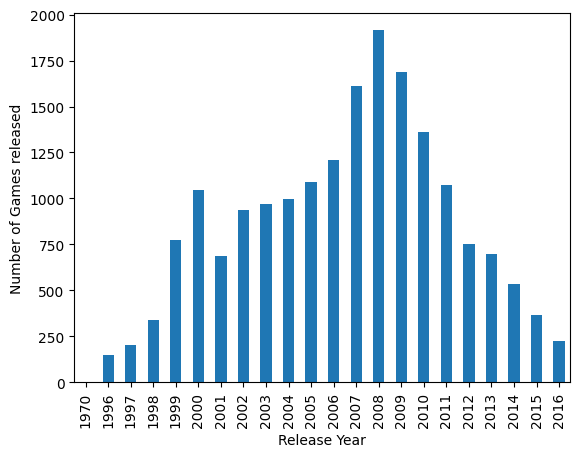

In [6]:
# Games Release year distribution
df.groupby(by = 'release_year').title.count().plot(kind = 'bar')
plt.xlabel('Release Year')
plt.ylabel('Number of Games released')

<Figure size 1000x600 with 0 Axes>

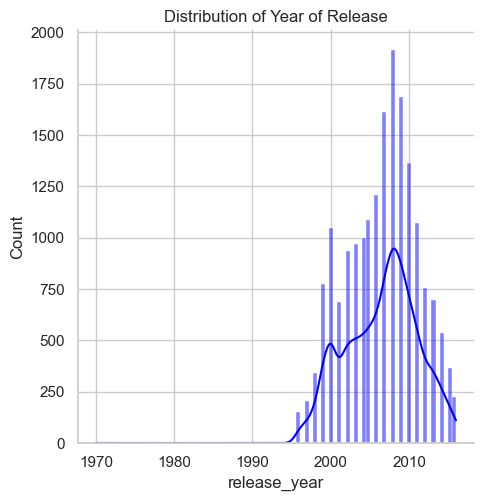

In [13]:
# Distribution of year of release
plt.figure(figsize=(10, 6))
sns.displot(df['release_year'], kde=True, color='blue')
plt.title('Distribution of Year of Release')
plt.show()

In [14]:
# Most recent year of release
df['release_year'].max()

2016

In [31]:
# Filter year
# Games release year = 2016
df.query('release_year == 2016')

,title,score,score_phrase,platform,genre,release_year,release_month,release_day
13,Inside,10.0,Masterpiece,PlayStation 4,Adventure,2016,6,28
14,Inside,10.0,Masterpiece,Xbox One,Adventure,2016,6,28
15,Inside,10.0,Masterpiece,PC,Adventure,2016,6,28
48,The Witness,10.0,Masterpiece,PlayStation 4,Puzzle,2016,1,25
49,The Witness,10.0,Masterpiece,PC,Puzzle,2016,1,25
...,...,...,...,...,...,...,...,...
16612,Cobalt,4.5,Bad,Xbox One,Platformer,2016,2,9
16912,Ghostbusters,4.4,Bad,PC,Action,2016,7,16
17240,Hyrule Warriors Legends,4.0,Bad,Nintendo 3DS,Action,2016,3,23
17603,Umbrella Corps,3.8,Awful,PlayStation 4,Shooter,2016,6,24


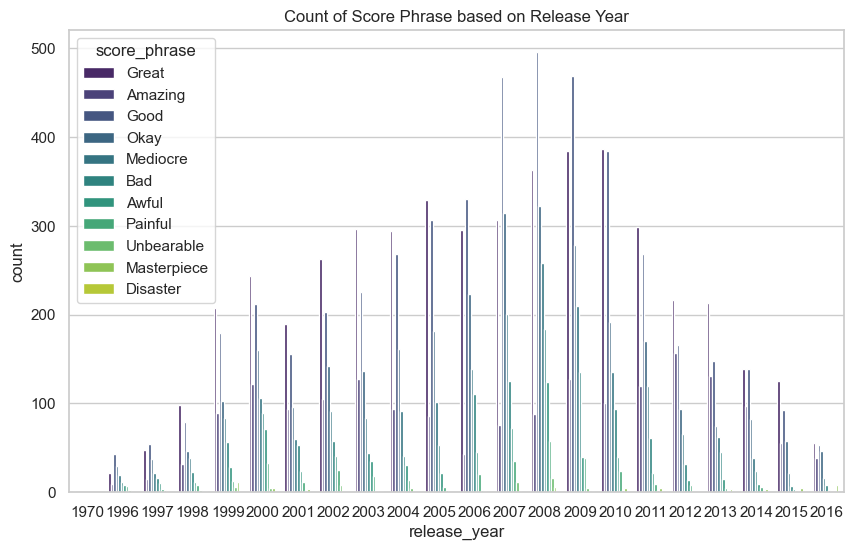

In [32]:
# Release year based on score_phrase
plt.figure(figsize=(10, 6))
sns.countplot(x='release_year', data=df, palette='viridis', hue='score_phrase')
plt.title('Count of Score Phrase based on Release Year')
plt.show()

In [16]:
df.genre.nunique()

112

(0.0, 50.0)

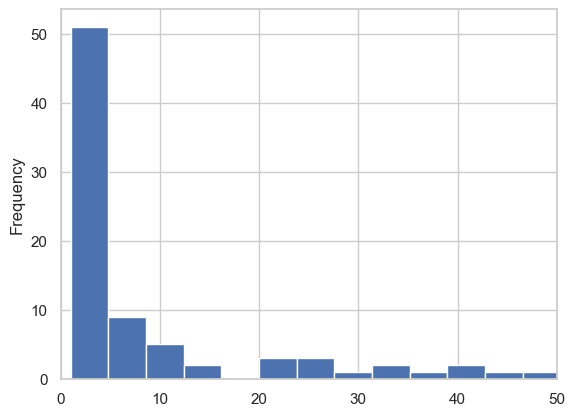

In [17]:
# Games Genre distribution
df.groupby(by = 'genre').title.count().plot.hist(bins = 1000)
plt.xlim(0,50)

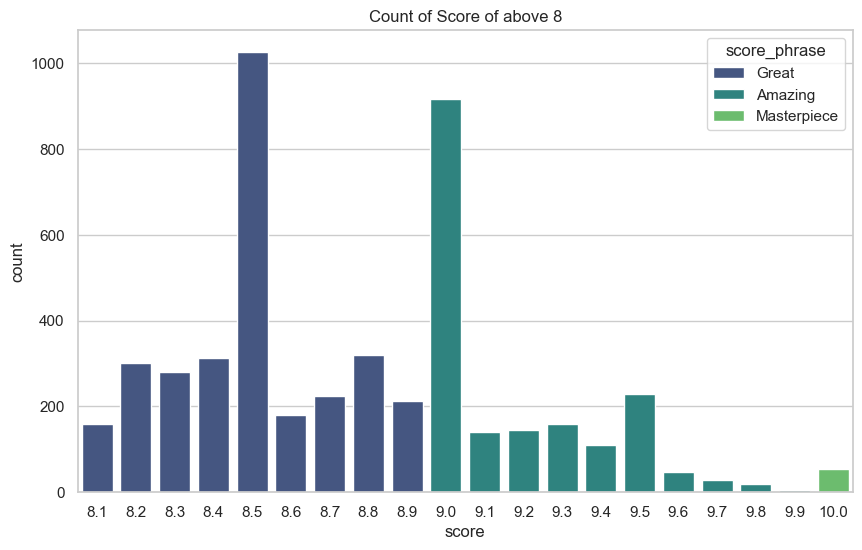

In [9]:
# Scores distribution
# visualize the data based on the score, categorize the score if they are the same
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='score', data=df[df['score'] > 8], palette='viridis', hue='score_phrase')
plt.title('Count of Score of above 8')
plt.show()

In [33]:
# Categorize the name based on score of 10 
top_titles = set()
for i in range(df[df['score'] == 10].shape[0]):
    # add (title, release year) to the set
    top_titles.add((df[df['score'] == 10].iloc[i]['title'], df[df['score'] == 10].iloc[i]['release_year']))

# Newest game with score of 10
newest_game = sorted(top_titles, key=lambda x: x[1], reverse=True)
newest_game

[('Inside', 2016),
 ('The Witness', 2016),
 ('Undertale', 2016),
 ('Grand Theft Auto V', 2015),
 ('Metal Gear Solid V: The Phantom Pain', 2015),
 ('The Last of Us: Remastered', 2014),
 ('Grand Theft Auto V', 2014),
 ('Grand Theft Auto V', 2013),
 ('The Last of Us', 2013),
 ('Infinity Blade II', 2011),
 ('Chrono Trigger', 2011),
 ('The Legend of Zelda: Skyward Sword', 2011),
 ("Uncharted 3: Drake's Deception", 2011),
 ('Super Mario Galaxy 2', 2010),
 ('Pac-Man Championship Edition DX', 2010),
 ('Red Dead Redemption -- Undead Nightmare', 2010),
 ('Grand Theft Auto IV (Special Edition)', 2008),
 ('Grand Theft Auto IV', 2008),
 ('Metal Gear Solid 4: Guns of the Patriots', 2008),
 ('Metal Gear Solid 4: Guns of the Patriots (Limited Edition)', 2008),
 ('The Legend of Zelda: Ocarina of Time', 2007),
 ('Tornado Mania', 2006),
 ('The Legend of Zelda: Oracle of Seasons', 2001),
 ('Dragon Warrior III', 2001),
 ('The Legend of Zelda: Oracle of Ages', 2001),
 ('Metal Gear Solid [2000]', 2000),
 ('M

In [34]:
# Platform distribution
df.platform.value_counts()

platform
PC                      3370
PlayStation 2           1686
Xbox 360                1631
Wii                     1366
PlayStation 3           1356
Nintendo DS             1045
PlayStation              952
Wireless                 910
iPhone                   842
Xbox                     821
PlayStation Portable     633
Game Boy Advance         623
GameCube                 509
Game Boy Color           356
Nintendo 64              302
Dreamcast                286
PlayStation 4            277
Nintendo DSi             254
Nintendo 3DS             225
Xbox One                 208
PlayStation Vita         155
Wii U                    114
iPad                      99
Lynx                      82
Macintosh                 81
Genesis                   58
NES                       49
TurboGrafx-16             40
Android                   39
Super NES                 33
NeoGeo Pocket Color       31
N-Gage                    30
Game Boy                  22
iPod                      17
Sega 

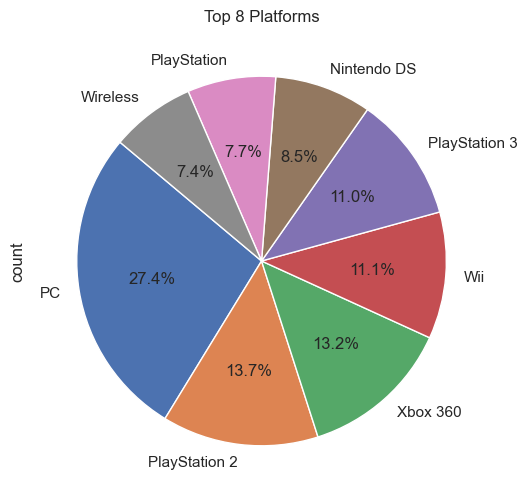

In [39]:
# Draw a pie chart of platforms top 8
plt.figure(figsize=(10, 6))
df['platform'].value_counts().head(8).plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Top 8 Platforms')
plt.show()

# Evolution

<Axes: xlabel='genre', ylabel='platform'>

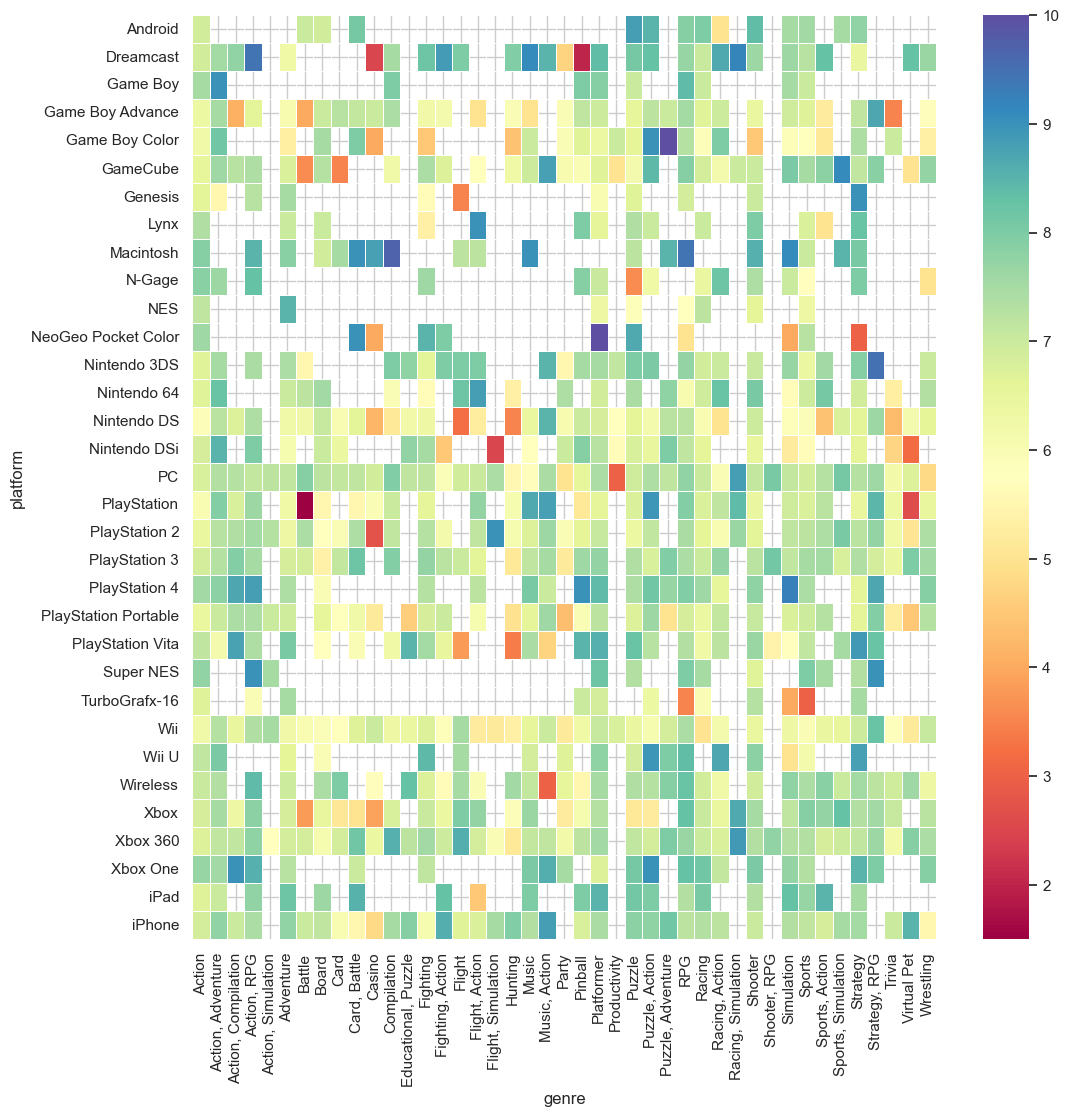

In [40]:
# Count numbers of platforms and genres

value_counts_p = df['platform'].value_counts()
value_counts_g = df['genre'].value_counts()

# Filter all that appear more than 20 times
filtered_values_p = value_counts_p[value_counts_p > 20].index.tolist()
filtered_values_g = value_counts_g[value_counts_g > 20].index.tolist()

#Pivot
df_pivot =( df[df['platform'].isin(filtered_values_p) #Filter on Platform > 20 counts
               & df['genre'].isin(filtered_values_g)]. #Filter on genre > 20 counts
            pivot_table(index = 'platform', columns = 'genre', values = 'score', aggfunc = 'mean')
            )
plt.figure(figsize = (12,12))
sns.heatmap(df_pivot, linewidth = 0.5, cmap = 'Spectral')

**Unless we want to pick on single platforms / genres, the plot above is really just for overview. Let's see how some of the popular platform developed over the years.**

**For this, we cut down even more and only have a look at the different generation of Playstation and PC as comparision**

In [41]:
# Check platform ps1, ps2, ps3, pc

platforms = ['PlayStation', 'PlayStation 2', 'PlayStation 3', 'PC']
df1 = df[df['platform'].isin(platforms)].groupby(['platform','release_year'], as_index = False).title.count()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   platform      50 non-null     object
 1   release_year  50 non-null     int64 
 2   title         50 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


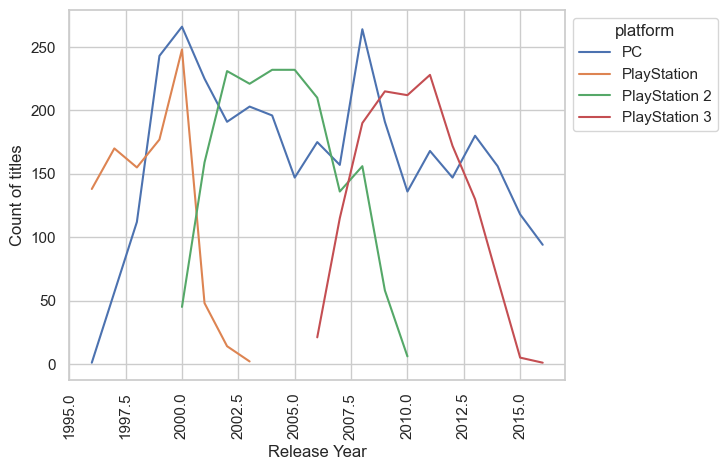

In [44]:
# Check platform peak year
# There are some future warning which we want to catch just for this plot:
import warnings
warnings.filterwarnings('ignore')

# Plot:
ax = sns.lineplot(x = 'release_year',y = 'title', data = df1, hue = 'platform')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation = 90)
plt.ylabel('Count of titles')
plt.xlabel('Release Year')
plt.show()

Platform peak year

playstation 1 : 2000

playstation 2 : 2005

playstation 3 : 2011